c:\Users\saniy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


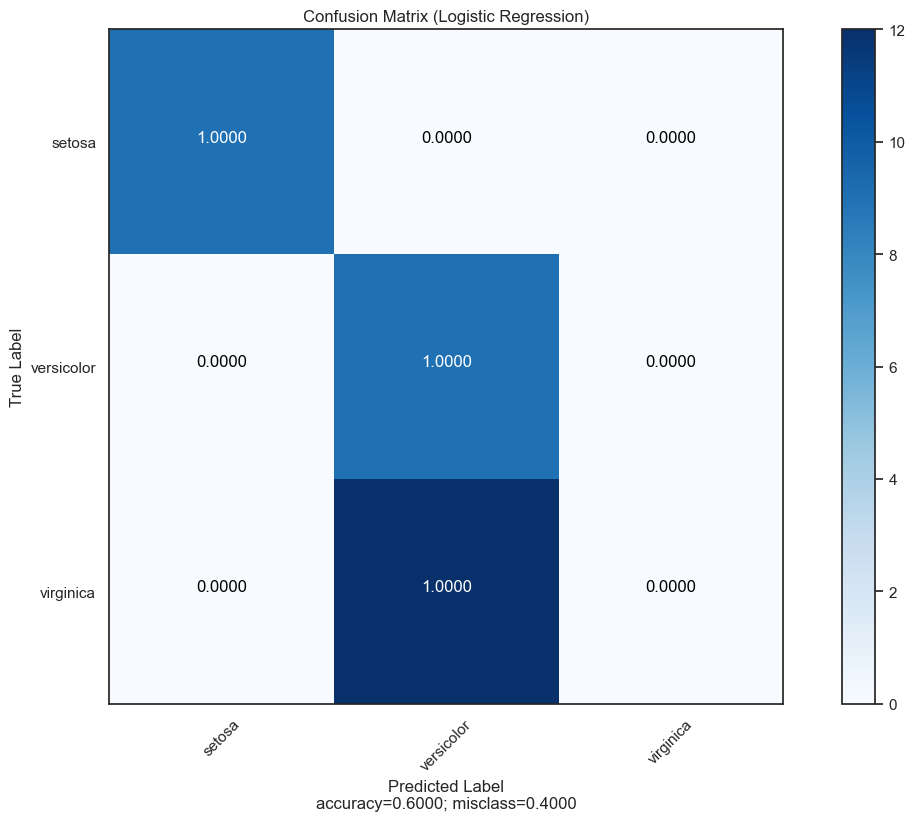

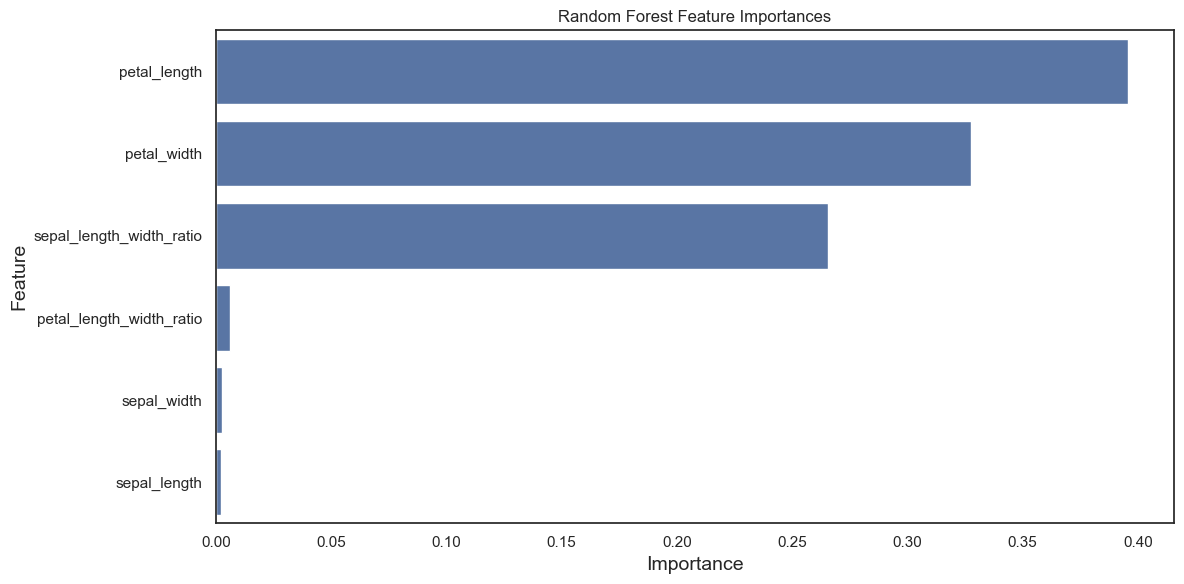

<Figure size 640x480 with 0 Axes>

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
sns.set(style='white')

# Load Data
dataset = pd.read_csv(r'C:\Users\saniy\Downloads\iris (1).csv')

# Feature names (Ensure no extra spaces or parentheses)
dataset.columns = [colname.strip(' (cm)').replace(" ", "_") for colname in dataset.columns.tolist()]
features_names = dataset.columns.tolist()[:4]

# Feature Engineering
dataset['sepal_length_width_ratio'] = dataset['sepal_length'] / dataset['sepal_width']
dataset['petal_length_width_ratio'] = dataset['petal_length'] / dataset['petal_width']

# Select Features (Correct the duplicate column issue)
dataset = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 
                   'sepal_length_width_ratio', 'petal_length_width_ratio', 'target']]

# Split Data
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=44)

# X_train, y_train, X_test, y_test
X_train = train_data.drop('target', axis=1).values.astype('float32')
y_train = train_data.loc[:, 'target'].values.astype('int32')
X_test = test_data.drop('target', axis=1).values.astype('float32')
y_test = test_data.loc[:, 'target'].values.astype('int32')

# Logistic Regression
logreg = LogisticRegression(C=0.0001, solver='lbfgs', max_iter=100, multi_class='multinomial')
logreg.fit(X_train, y_train)
predictions_lr = logreg.predict(X_test)

cm_lr = confusion_matrix(y_test, predictions_lr)
f1_lr = f1_score(y_test, predictions_lr, average='micro')
prec_lr = precision_score(y_test, predictions_lr, average='micro')
recall_lr = recall_score(y_test, predictions_lr, average='micro')

# Accuracy
train_acc_lr = logreg.score(X_train, y_train) * 100
test_acc_lr = logreg.score(X_test, y_test) * 100

# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
predictions_rf = rf_reg.predict(X_test)

# Convert predictions to class labels
predictions_rf_class = np.round(predictions_rf).astype(int)

f1_rf = f1_score(y_test, predictions_rf_class, average='micro')
prec_rf = precision_score(y_test, predictions_rf_class, average='micro')
recall_rf = recall_score(y_test, predictions_rf_class, average='micro')

# Accuracy
train_acc_rf = rf_reg.score(X_train, y_train) * 100
test_acc_rf = rf_reg.score(X_test, y_test) * 100

# Confusion Matrix Plotting Function
def plot_cm(cm, target_name, title="Confusion Matrix", cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(12, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_name is not None:
        tick_marks = np.arange(len(target_name))
        plt.xticks(tick_marks, target_name, rotation=45)
        plt.yticks(tick_marks, target_name)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else 'black')
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('ConfusionMatrix.png', dpi=120)
    plt.show()

target_name = np.array(['setosa', 'versicolor', 'virginica'])
plot_cm(cm_lr, target_name, title="Confusion Matrix (Logistic Regression)", cmap=None, normalize=True)

# Feature Importance Plotting
importances = rf_reg.feature_importances_
labels = dataset.columns[:-1]  # Exclude 'target' column for features
feature_df = pd.DataFrame(list(zip(labels, importances)), columns=['feature', 'importance'])
features = feature_df.sort_values(by='importance', ascending=False)

# Create feature importance plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='importance', y='feature', data=features)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)
ax.set_title('Random Forest Feature Importances', fontsize=12)

# Show the feature importance plot
plt.tight_layout()  # Make sure layout is adjusted
plt.show()  # This ensures the plot will be shown on the screen

# Save the feature importance plot as a PNG image
plt.savefig('FeatureImportance.png')

# Saving Scores to a File
with open('scores.txt', "w") as score:
    score.write("Random Forest Train Var: %2.1f%%\n" % train_acc_rf)
    score.write("Random Forest Test Var: %2.1f%%\n" % test_acc_rf)
    score.write("F1 Score: %2.1f%%\n" % f1_rf)
    score.write("Recall Score: %2.1f%%\n" % recall_rf)
    score.write("Precision Score: %2.1f%%\n" % prec_rf)

    score.write("\n\n")

    score.write("Logistic Regression Train Var: %2.1f%%\n" % train_acc_lr)
    score.write("Logistic Regression Test Var: %2.1f%%\n" % test_acc_lr)
    score.write("F1 Score: %2.1f%%\n" % f1_lr)
    score.write("Recall Score: %2.1f%%\n" % recall_lr)
    score.write("Precision Score: %2.1f%%\n" % prec_lr)
